In [19]:
import json

effect_area_g=[]
effect_area_p=[]

for eng in [100,200,300,400,500,600,700,800,900,1000]:
    print(eng)
    with open("data/origin/gamma_nonoise_"+str(eng)+".json","r") as f:
        json_g=json.load(f)
        f.close()
    with open("data/origin/proton_nonoise_"+str(eng)+".json","r") as f:
        json_p=json.load(f)
        f.close()

    def calc_eff(list_data:list,min:int,min_total:int):
        eff=0
        for i in range(len(list_data)):
            temp_length_1=len(list_data[i]["1"])
            temp_length_2=len(list_data[i]["2"])
            temp_length_3=len(list_data[i]["3"])
            temp_length_4=len(list_data[i]["4"])
            if (temp_length_1==0 or temp_length_1>=min) and (temp_length_2==0 or temp_length_1>=min) and (temp_length_3==0 or temp_length_1>=min) and (temp_length_4==0 or temp_length_1>=min) and ((temp_length_1+temp_length_2+temp_length_3+temp_length_4)>min_total):
                eff=eff+1
        return eff
    valid_g=calc_eff(json_g["c2"],4,5)+calc_eff(json_g["c3"],4,5)+calc_eff(json_g["c4"],4,5)
    total_g=len(json_g["c1"])+len(json_g["c2"])+len(json_g["c3"])+len(json_g["c4"])
    valid_p=calc_eff(json_p["c2"],2,3)+calc_eff(json_p["c3"],2,3)+calc_eff(json_p["c4"],2,3)
    total_p=len(json_p["c1"])+len(json_p["c2"])+len(json_p["c3"])+len(json_p["c4"])

    effect_area_g.append(valid_g/total_g)
    effect_area_p.append(valid_p/total_p)

print(effect_area_g)
print(effect_area_p)

100
200
300
400
500
600
700
800
900
1000
[0.03553233423822097, 0.14011568060389196, 0.207041589615287, 0.2718900966183575, 0.29134412385643915, 0.326059008105988, 0.3519771708112515, 0.3599330685929086, 0.36868887280875795, 0.3858182798598005]
[0.03745230140760327, 0.07016843061948459, 0.10503399281949431, 0.14532680179167978, 0.16655366518976364, 0.19823205363624716, 0.22556088277275554, 0.23610912522519947, 0.2474913849376831, 0.2709049787774576]


In [7]:
import math

DetectG=[]
DetectP=[]
cs=[0.99987889,0.9999233,0.9999503,0.99996345,0.999972060,0.9999775,0.99998048,0.99998558,0.99998837,0.99999039]
lg=[-1,-0.6990,-0.5229,-0.3979,-0.301,-0.2218,-0.1549,-0.0969,-0.04576,0]
for i,eng in enumerate([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]):
    DetectG.append(2.83/1.62*1e-11*math.pow(eng,-1.62)*effect_area_g[i]*800*800*10000*0.68*1.152e6)
    # DetectP.append(1.43/1.7*1e-5*math.pow(eng,-1.70)*effect_area_p[i]*800*800*10000*1.152e6*2*math.pi*(1-cs[i]))
    DetectP.append(0.898*1e-5*math.pow(10,-(lg[i]+1)/0.7)*effect_area_p[i]*800*800*10000*1.152e6*2*math.pi*(1-cs[i]))
    # print(math.pow(10,-(lg[i]+1)/3.5),-(lg[i]+1/3.5))
    # DetectP.append(0.898*1e-5*effect_area_p[i]*800*800*10000*1.152e6*2*math.pi*(1-cs[i]))

Q=[1.1,1.2,1.45,1.7,2,2.25,2.4,2.55,2.7,2.8]
Sensitivity=[]
for i,eng in enumerate([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]):
    Sigma=DetectG[i]*Q[i]/math.sqrt(DetectP[i])
    Sensitivity.append(2.83/1.62*1e-11*math.pow(eng,-1.62)*(5/Sigma)*eng)

print(Sensitivity)

1.0 0.7142857142857143
0.8203515443298183 0.41328571428571426
0.7306101717566011 0.23718571428571433
0.672932383854443 0.11218571428571428
0.6313725761877556 0.015285714285714291
0.5993177534030553 -0.0639142857142857
0.5735124592352561 -0.1308142857142857
0.5520411203245383 -0.1888142857142857
0.5337771764051688 -0.2399542857142857
0.5179474679231212 -0.2857142857142857
[7.311291768886792e-13, 6.189985054429464e-13, 4.556699476578629e-13, 3.3029668461419305e-13, 2.64212681351113e-13, 2.2488654874126273e-13, 2.0708327484744236e-13, 1.749351375065134e-13, 1.5389747046061368e-13, 1.3948303398528382e-13]


In [3]:
import json

effect_area_g=[]
effect_area_p=[]

for eng in [100,200,300,400,500,600,700,800,900,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]:
    print(eng)
    with open("data/origin/gamma_nolimit_new_"+str(eng)+".json","r") as f:
        json_g=json.load(f)
        f.close()
    with open("data/origin/proton_nolimit_new_"+str(eng)+".json","r") as f:
        json_p=json.load(f)
        f.close()
    valid_g=0
    for item in json_g["c4"]:
        if (len(item["1"])+len(item["2"])+len(item["3"])+len(item["4"]))>=10:
            valid_g=valid_g+1
    total_g=len(json_g["c1"])+len(json_g["c2"])+len(json_g["c3"])+len(json_g["c4"])
    valid_p=0
    for item in json_p["c4"]:
        if (len(item["1"])+len(item["2"])+len(item["3"])+len(item["4"]))>=10:
            valid_p=valid_p+1
    total_p=len(json_p["c1"])+len(json_p["c2"])+len(json_p["c3"])+len(json_p["c4"])

    effect_area_g.append(valid_g/total_g)
    effect_area_p.append(valid_p/total_p)

print(effect_area_g)
print(effect_area_p)

100
200
300
400
500
600
700
800
900
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
[0.6357786070207584, 0.8549184654276746, 0.9052752230985455, 0.9211866946359005, 0.9233488300610904, 0.9271826439456498, 0.9300939530648565, 0.9295134978018385, 0.9315373861790154, 0.932354297470824, 0.9339902156687108, 0.9358134369794558, 0.6734228362877998, 0.7282862139317983, 0.7634006773327106, 0.7861915367483296, 0.8127598566308244, 0.8362411998775635, 0.8537775534241966]
[0.10969759483930121, 0.3114567088315139, 0.49784873591010914, 0.6342970187068337, 0.7231312819457308, 0.7886795029359552, 0.8304922951043229, 0.8607409925220938, 0.8804868926592091, 0.888998369122044, 0.9225452676072429, 0.9315435214930397, 0.43466404060298464, 0.4868631661136053, 0.533378966017072, 0.5746119990734306, 0.6119727739343896, 0.6414272181875592, 0.6668778710597181]


In [8]:
import math

DetectG=[]
DetectP=[]
cs=[0.9999469,0.9999761,0.9999846,0.9999877,0.9999901,0.9999906,0.9999913,0.9999930,0.9999938,0.9999942]
lg=[-1,-0.6990,-0.5229,-0.3979,-0.301,-0.2218,-0.1549,-0.0969,-0.04576,0]
for i,eng in enumerate([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]):
    DetectG.append(2.83/1.62*1e-11*math.pow(eng,-1.62)*effect_area_g[i]*800*800*10000*0.68*1.152e6)
    # DetectP.append(1.43/1.7*1e-5*math.pow(eng,-1.70)*effect_area_p[i]*800*800*10000*1.152e6*2*math.pi*(1-cs[i]))
    DetectP.append(0.898*1e-5*math.pow(10,-(lg[i]+1)/0.7)*effect_area_p[i]*800*800*10000*1.152e6*2*math.pi*(1-cs[i]))
    # print(math.pow(10,-(lg[i]+1)/3.5),-(lg[i]+1/3.5))
    # DetectP.append(0.898*1e-5*effect_area_p[i]*800*800*10000*1.152e6*2*math.pi*(1-cs[i]))

Q=[1.6, 3.108888542538125, 3.719652475210671, 3.9799780858579865, 4.215272387789213, 4.290366313937477, 4.355447716599306, 4.440554166234005, 4.480604260179746, 4.540679401098356]
Sensitivity=[]
for i,eng in enumerate([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]):
    Sigma=DetectG[i]*Q[i]/math.sqrt(DetectP[i])
    Sensitivity.append(2.83/1.62*1e-11*math.pow(eng,-1.62)*(5/Sigma)*eng)

print(Sensitivity)

[3.3283123497102287e-13, 1.3337270599242335e-13, 9.88776621140481e-14, 8.184295849914803e-14, 7.462123061445831e-14, 7.622971416198049e-14, 7.618038811862974e-14, 6.999168500125856e-14, 6.771184470880274e-14, 6.682067839649875e-14]


In [6]:
import json

en_list=[]
for en in [100,200,300,400,500,600,700,800,900,1000,2000,3000,4000,5000,6000,7000,8000,9000]:
    with open("data/origin/proton_nonoise_"+str(en)+".json","r") as f:
        data_json=json.load(f)
        f.close()

    effect=0
    for item in data_json["c4"]:
        length=len(item["1"])+len(item["2"])+len(item["3"])+len(item["4"])
        if length<10:
            continue
        effect=effect+1
    en_list.append(effect/(len(data_json["c4"])+len(data_json["c3"])+len(data_json["c2"])+len(data_json["c1"])))

print(en_list)

[0.004561344232043768, 0.020029467892501998, 0.0357050413386726, 0.058798138531058204, 0.07831896943935317, 0.10465792935937658, 0.12532390132669982, 0.13097843931268469, 0.15167245008248478, 0.1632060657011881, 0.2432992881460848, 0.3107759206413915, 0.36064303699399575, 0.4012456105479361, 0.436181324420305, 0.4653430332423967, 0.4997379607523438, 0.5248788138009695]


In [4]:
from bin.dataLoader import load_data

data,label=load_data("gamma_nonoise_new",500,100,[4],20,0,32,"angle",True,True,None,None,None)

gamma_nonoise_new500 loading finish with length: 100


In [10]:
label[4]

tensor([1.0033])

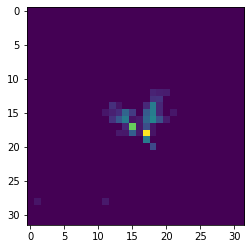

In [5]:
import matplotlib.pyplot as plt

plt.imshow(data[0][0].numpy())
plt.show()

In [2]:
from bin.dataTranslater import add_data

for i in [3000,4000,5000]:
    print(i)
    add_data("gamma_nolimit_3",i)

3000
4000
5000


In [ ]:
import json

with open("data/origin/proton_nolimit_3_45.json","r") as f:
    d=json.load(f)
    f.close()
d["c4"][0]